In [4]:
import numpy as np  
from scipy import stats  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
from pyod.models.knn import KNN   
from pyod.utils.data import generate_data, get_outliers_inliers  

In [3]:
!pip install pyod


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pyod-2.0.2.tar.gz (165 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for numba>=0.51 from https://files.pythonhosted.org/packages/79/89/2d924ca60dbf949f18a6fec223a2445f5f428d9a5f97a6b29c2122319015/numba-0.60.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for llvmlite<0.44,>=0.43.0dev0 from https://files.pythonhosted.org/packages/20/ab/ed5ed3688c6ba4f0b8d789da19fd8e30a9cf7fc5852effe311bc5aefe73e/llvmlite-0.43.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
    --------------------------------------- 0.1/2.7 MB 1.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.1/2.7 MB 1.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.7 MB 1.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.7 MB 1.0 MB/s eta 0:00:03
   --- -----------------------------------

In [5]:
# generating a random dataset with two features  
X_train, y_train = generate_data(n_train = 300, train_only = True,  
                                                   n_features = 2)  
   
# Setting the percentage of outliers  
outlier_fraction = 0.1 
   
# Storing the outliers and inliners in different numpy arrays  
X_outliers, X_inliers = get_outliers_inliers(X_train, y_train)  
n_inliers = len(X_inliers)  
n_outliers = len(X_outliers)  
   
# Separating the two features  
f1 = X_train[:, [0]].reshape(-1, 1)  
f2 = X_train[:, [1]].reshape(-1, 1) 

Text(0, 0.5, 'Feature 2')

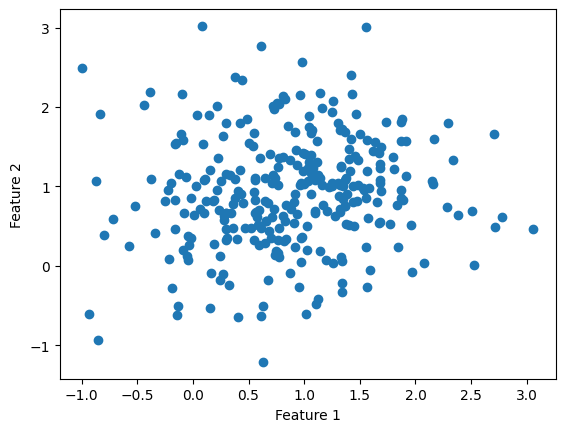

In [6]:
# Visualising the dataset  
# create a meshgrid  
xx, yy = np.meshgrid(np.linspace(-10, 10, 200),  
                     np.linspace(-10, 10, 200))  
   
# scatter plot  
plt.scatter(f1, f2)  
plt.xlabel('Feature 1')  
plt.ylabel('Feature 2') 

In [7]:
# Training the classifier  
clf = KNN(contamination = outlier_fraction)  
clf.fit(X_train, y_train)  
   
# You can print this to see all the prediction scores  
scores_pred = clf.decision_function(X_train)*-1 
   
y_pred = clf.predict(X_train)  
n_errors = (y_pred != y_train).sum()  
# Counting the number of errors  
   
print('The number of prediction errors are ' + str(n_errors)) 

C:\Users\nitin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyod\models\base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


The number of prediction errors are 43


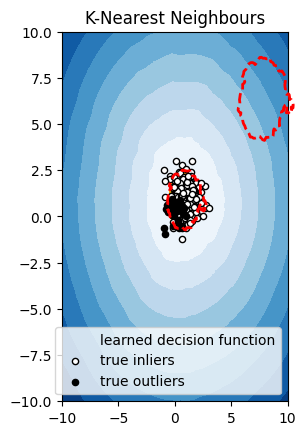

In [8]:
# threshold value to consider a  
# datapoint inlier or outlier  
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction)  
   
# decision function calculates the raw   
# anomaly score for every point  
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1 
Z = Z.reshape(xx.shape) 
# fill blue colormap from minimum anomaly  
# score to threshold value  
subplot = plt.subplot(1, 2, 1)  
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(),   
                  threshold, 10), cmap = plt.cm.Blues_r)  
   
# draw red contour line where anomaly   
# score is equal to threshold  
a = subplot.contour(xx, yy, Z, levels =[threshold],  
                     linewidths = 2, colors ='red')  
   
# fill orange contour lines where range of anomaly  
# score is from threshold to maximum anomaly score  
subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange')  
   
# scatter plot of inliers with white dots  
b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1],  
                                    c ='white', s = 20, edgecolor ='k')   
   
# scatter plot of outliers with black dots  
c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1],   
                                    c ='black', s = 20, edgecolor ='k')  
subplot.axis('tight')  
   
subplot.legend(  
    [a.collections[0], b, c],  
    ['learned decision function', 'true inliers', 'true outliers'],  
    prop = matplotlib.font_manager.FontProperties(size = 10),  
    loc ='lower right')  
   
subplot.set_title('K-Nearest Neighbours')  
subplot.set_xlim((-10, 10))  
subplot.set_ylim((-10, 10))  
plt.show()   